# PizzaHut Regression

## imoprting all modules

In [29]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import scale
#from sklearn import cross_validation
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error

import plotly   
from plotly.graph_objs import *
import plotly.offline as plot
import plotly.graph_objs as go
plot.offline.init_notebook_mode(connected=True)

# for OLS
import statsmodels.formula.api as sm
import statsmodels.stats.diagnostic as sms

## importing csv file

In [30]:
Classification_Data = pd.read_csv("Ex06_Pizzademand_Classification.csv")
Regression_Data = pd.read_csv("Ex06_Pizzademand_Regreesion.csv")

In [31]:
Regression_Data.describe()

,PizzaPrice,BurgerPrice,RoomTemperature,DeliveryMode,Income,softdrinkPrice,Location,PizzaDemand
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,8.506047,6.506047,25.000330,1.560000,51.943641,29.829920,1.500000,16055.530269
std,2.963850,2.963850,0.102355,0.498888,24.301601,10.340436,0.502519,711.008174
min,-0.058743,-2.058743,24.766638,1.000000,8.004882,-10.752252,1.000000,14771.977815
25%,6.870181,4.870181,24.936316,1.000000,35.598931,22.394425,1.000000,15475.084159
50%,8.482676,6.482676,24.998155,2.000000,50.271183,28.859626,1.500000,15988.807993
75%,10.552418,8.552418,25.059729,2.000000,66.658061,38.269381,2.000000,16585.240418
max,15.812742,13.812742,25.239635,2.000000,120.819461,55.652873,2.000000,18156.087548


In [32]:
Regression_Data.corr()

,PizzaPrice,BurgerPrice,RoomTemperature,DeliveryMode,Income,softdrinkPrice,Location,PizzaDemand
PizzaPrice,1.000000,1.000000,-0.056121,-0.063815,0.163955,-0.116256,-0.059603,0.219790
BurgerPrice,1.000000,1.000000,-0.056121,-0.063815,0.163955,-0.116256,-0.059603,0.219790
RoomTemperature,-0.056121,-0.056121,1.000000,-0.023415,-0.091006,-0.064765,-0.161151,-0.075070
DeliveryMode,-0.063815,-0.063815,-0.023415,1.000000,-0.144249,0.015619,0.161165,-0.143826
Income,0.163955,0.163955,-0.091006,-0.144249,1.000000,-0.051338,-0.192671,0.974370
softdrinkPrice,-0.116256,-0.116256,-0.064765,0.015619,-0.051338,1.000000,0.151559,-0.271651
Location,-0.059603,-0.059603,-0.161151,0.161165,-0.192671,0.151559,1.000000,-0.219684
PizzaDemand,0.219790,0.219790,-0.075070,-0.143826,0.974370,-0.271651,-0.219684,1.000000


## Scaling the data

In [34]:
for i in Regression_Data.columns.tolist():
    Regression_Data[i] = (Regression_Data[i] - Regression_Data[i].mean())/(Regression_Data[i].var())

## Trainig and Test Data

In [35]:
df_x_train = Regression_Data.drop(['PizzaDemand'], axis = 1).iloc[:-20]
df_y_train = Regression_Data.drop(['PizzaPrice', 'BurgerPrice', 'RoomTemperature', 'DeliveryMode', 'Income', 'softdrinkPrice',
                                   'Location'], axis = 1).iloc[:-20]

df_x_test = Regression_Data.drop(['PizzaDemand'], axis = 1).iloc[80:]
df_y_test = Regression_Data.drop(['PizzaPrice', 'BurgerPrice', 'RoomTemperature', 'DeliveryMode', 'Income', 'softdrinkPrice',
                                   'Location'], axis = 1).iloc[80:]


## Correlation Plot

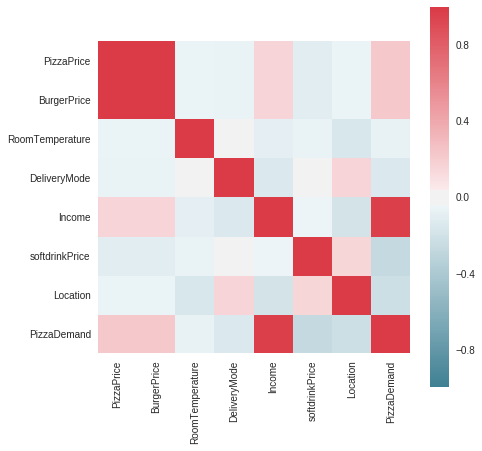

In [36]:
f, ax = plt.subplots(figsize=(7, 7))
correlation = Regression_Data.corr()
sns.heatmap(correlation, mask=np.zeros_like(correlation, dtype=np.bool), 
            cmap = sns.diverging_palette(220, 10, as_cmap=True), square=True, ax = ax)
plt.show()

## Linear Regression

In [37]:
reg = linear_model.LinearRegression()
reg.fit(df_x_train, df_y_train)

coefficients = reg.coef_.tolist()
intercept = reg.intercept_.tolist()
mean_square_error = np.mean((reg.predict(df_x_test) - df_y_test)**2)
mean_square_error

PizzaDemand    7.617446e-14
dtype: float64

In [38]:
variance = reg.score(df_x_test, df_y_test)
variance

0.99999996570494387

## Scatter Matrix

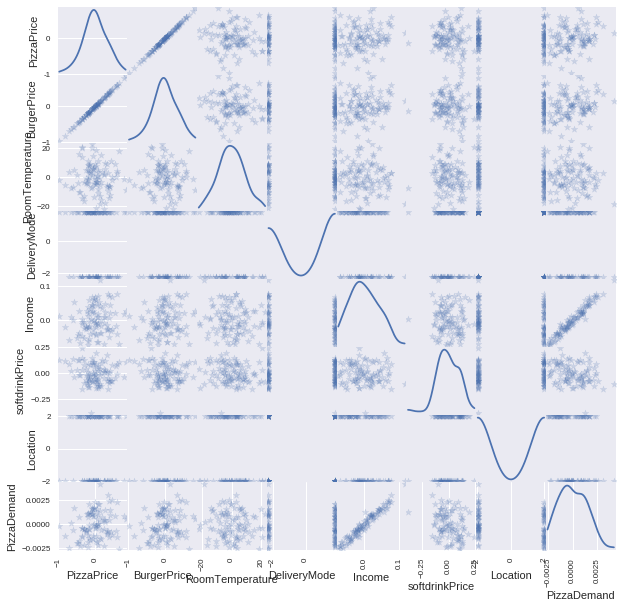

In [39]:
scatter_matrix(Regression_Data,alpha=0.2, figsize=(10, 10), diagonal='kde', grid=True, marker='*')
plt.show()

# Model Selection

## Ridge Regression

In [40]:
alphas = 10**(np.linspace(-5,0,100))
Ridge_df = pd.DataFrame()
model = Ridge()
coeff =  []
for a in alphas:
    model.set_params(alpha = a)
    model.fit(df_x_train, df_y_train)
    coeff.append(model.coef_)
    df = pd.DataFrame({'PizzaPrice':[model.coef_[0][0]],'BurgerPrice':[model.coef_[0][1]],
                       'RoomTemperature':[model.coef_[0][2]],'DeliveryMode':[model.coef_[0][3]],
                       'Income':[model.coef_[0][4]], 'softdrinkPrice': [model.coef_[0][5]], 'Location':[model.coef_[0][6]]})
    Ridge_df = Ridge_df.append(df)

In [41]:
trace0 = Scatter(
    x = alphas,
    y = Ridge_df['PizzaPrice'],
    name = 'PizzaPrice',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
    )
trace1 = Scatter(
    x = alphas,
    y = Ridge_df['BurgerPrice'],
    name = 'BurgerPrice',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4)
)
trace2 = Scatter(
    x = alphas,
    y = Ridge_df['RoomTemperature'],
    name = 'RoomTemperature',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)
trace3 = Scatter(
    x = alphas,
    y = Ridge_df['DeliveryMode'],
    name = 'DeliveryMode',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)
trace4 = Scatter(
    x = alphas,
    y = Ridge_df['Income'],
    name = 'Income',
    line = dict(
        color = ('rgb(200, 80, 140)'),
        width = 4,)
)
trace5 = Scatter(
    x = alphas,
    y = Ridge_df['softdrinkPrice'],
    name = 'softdrinkPrice',
    line = dict(
        color = ('rgb(200, 80, 140)'),
        width = 4,)
)
trace6 = Scatter(
    x = alphas,
    y = Ridge_df['Location'],
    name = 'Location',
    line = dict(
        color = ('rgb(200, 80, 140)'),
        width = 4,)
)

data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6]

layout = dict(xaxis = dict(title = 'Alpha'),
              yaxis = dict(title = 'Weights'),
              )

fig = dict(data = data, layout = layout)
plot.iplot(fig, filename='RidgeRegression.html')

In [42]:
ridge2 = Ridge(alpha=0.005, normalize=True)
ridge2.fit(df_x_train, df_y_train.PizzaDemand) # Fit a ridge regression on the training data
pred2 = ridge2.predict(df_x_test) # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index=df_x_train.columns)) # Print coefficients
print(mean_squared_error(df_y_test, pred2)) # Calculate the test MSE

PizzaPrice         7.934230e-05
BurgerPrice        7.934230e-05
RoomTemperature   -1.155169e-07
DeliveryMode      -5.103169e-07
Income             3.253143e-02
softdrinkPrice    -3.154154e-03
Location          -6.970010e-07
dtype: float64
6.44508886604e-11


In [43]:
ridgecv = RidgeCV(alphas=alphas, scoring='mean_squared_error', normalize=True)
ridgecv.fit(df_x_train, df_y_train)

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_

RidgeCV(alphas=array([  1.00000e-05,   1.12332e-05, ...,   8.90215e-01,   1.00000e+00]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=True,
    scoring='mean_squared_error', store_cv_values=False)

## Lasso

In [44]:
Lasso_df = pd.DataFrame()
coeff  = []
lasso = Lasso(max_iter = 10000, normalize = True)
for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(df_x_train, df_y_train)
    coeff.append(model.coef_)
    df_new = pd.DataFrame({'PizzaPrice':[model.coef_[0][0]],'BurgerPrice':[model.coef_[0][1]],
                       'RoomTemperature':[model.coef_[0][2]],'DeliveryMode':[model.coef_[0][3]],
                       'Income':[model.coef_[0][4]], 'softdrinkPrice': [model.coef_[0][5]], 'Location':[model.coef_[0][6]]})
    Lasso_df = Lasso_df.append(df_new)


In [45]:
trace0 = Scatter(
    x = alphas,
    y = Lasso_df['PizzaPrice'],
    name = 'PizzaPrice',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
    )
trace1 = Scatter(
    x = alphas,
    y = Lasso_df['BurgerPrice'],
    name = 'BurgerPrice',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4)
)
trace2 = Scatter(
    x = alphas,
    y = Lasso_df['RoomTemperature'],
    name = 'RoomTemperature',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)
trace3 = Scatter(
    x = alphas,
    y = Lasso_df['DeliveryMode'],
    name = 'DeliveryMode',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)
trace4 = Scatter(
    x = alphas,
    y = Lasso_df['Income'],
    name = 'Income',
    line = dict(
        color = ('rgb(200, 80, 140)'),
        width = 4,)
)
trace5 = Scatter(
    x = alphas,
    y = Lasso_df['softdrinkPrice'],
    name = 'softdrinkPrice',
    line = dict(
        color = ('rgb(200, 80, 140)'),
        width = 4,)
)
trace6 = Scatter(
    x = alphas,
    y = Lasso_df['Location'],
    name = 'Location',
    line = dict(
        color = ('rgb(200, 80, 140)'),
        width = 4,)
)

data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6]

layout = dict(xaxis = dict(title = 'Alpha'),
              yaxis = dict(title = 'Weights'),
              )

fig = dict(data = data, layout = layout)
plot.iplot(fig, filename='LassoRegression.html')

In [46]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(df_x_train, df_y_train)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(df_x_train, df_y_train)
mean_squared_error(df_y_test, lasso.predict(df_x_test))

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1082: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



6.450955218793028e-12

In [47]:
pd.Series(lasso.coef_, index=df_x_test.columns)

PizzaPrice         1.533765e-04
BurgerPrice        1.647531e-21
RoomTemperature   -0.000000e+00
DeliveryMode      -0.000000e+00
Income             3.267977e-02
softdrinkPrice    -3.159891e-03
Location          -0.000000e+00
dtype: float64

In [48]:
# So only features we can take is PizzaPrice, BurgerPrice,Income,SoftDrinkPrice

# Model is by taking PizzaPrice, BurgerPrice,Income,SoftDrinkPrice

In [49]:
model = sm.ols(formula = "PizzaDemand ~ PizzaPrice + BurgerPrice + Income + softdrinkPrice", 
                  data = Regression_Data[:80]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PizzaDemand   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.470e+09
Date:                Sun, 02 Apr 2017   Prob (F-statistic):          6.73e-295
Time:                        17:28:51   Log-Likelihood:                 1129.4
No. Observations:                  80   AIC:                            -2251.
Df Residuals:                      76   BIC:                            -2241.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -7.83e-09   2.06e-08     -0.381      0.704   -4.88e-08    3.31e-08
PizzaPrice      7.818e-05   3.02e-08   2588.702      0.000    7.81e-05    7.82e-05
BurgerPrice     7.818e-05   3.02e-08   2588.702      0.000    7.81e-05    7.82e-05
Income             0.0327    5.1e-07   6.42e+04      0.000       0.033       0.033
softdrinkPrice    -0.0032   2.23e-07  -1.42e+04      0.000      -0.003      -0.003
==============================================================================
Omnibus:                        0.417   Durbin-Watson:                   2.305
Prob(Omnibus):                  0.812   Jarque-Bera (JB):                0.558
Skew:                          -0.146   Prob(JB):                        0.757
Kurtosis:                       2.714   Cond. No.                     1.06e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.17e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

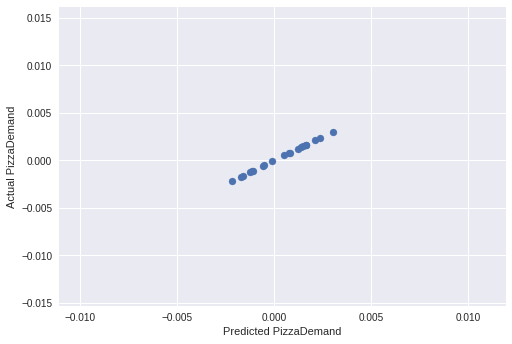

In [50]:
y_model = model.predict(df_x_test)
plt.scatter(y_model, df_y_test)
plt.xlabel("Predicted PizzaDemand")
plt.ylabel("Actual PizzaDemand")
plt.show()

In [51]:
SSE_new = ((y_model - df_y_test.PizzaDemand)**2).sum()
mean = df_y_test.PizzaDemand.mean()
TSS = ((y_model - mean)**2).sum()
R_Square_new = 1-(SSE_new/TSS)
RMSE = (((df_y_test.PizzaDemand - mean)**2).sum()) * ((1 - R_Square_new)/100)
RMSE

1.4986055120138888e-14

## Box Plot

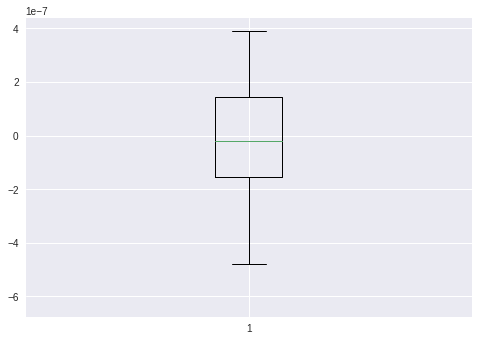

In [52]:
residual_new = np.array(y_model - df_y_test.PizzaDemand)
plt.boxplot(residual_new)
plt.show()

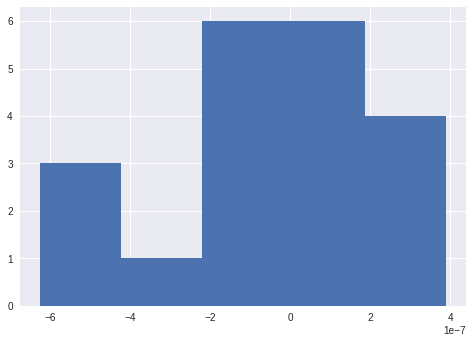

In [53]:
plt.hist(residual_new, bins=5)
plt.show()

In [54]:
name = ['F statistics', 'p_value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
list(zip(name,test))

[('F statistics', 1.3765548994824084), ('p_value', 0.17102627064805889)]